# Question

### Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.dpi'] = (150)
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
sns.set_theme(style='darkgrid',palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1  = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Random%20Forests/Fraud_check.csv')
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df  = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Random%20Forests/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
# Adding Tax <= 30000 as "Risky" and others are "Good"
df['Tax_Good'] = pd.cut(df['Taxable.Income'],bins=[1000,30000,10000000],labels=['Risky','Good'])

In [8]:
df.drop(columns='Taxable.Income',inplace=True)

In [9]:
df['Tax_Good'] = df['Tax_Good'].astype(object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Tax_Good         600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [11]:
# Data Visualization 

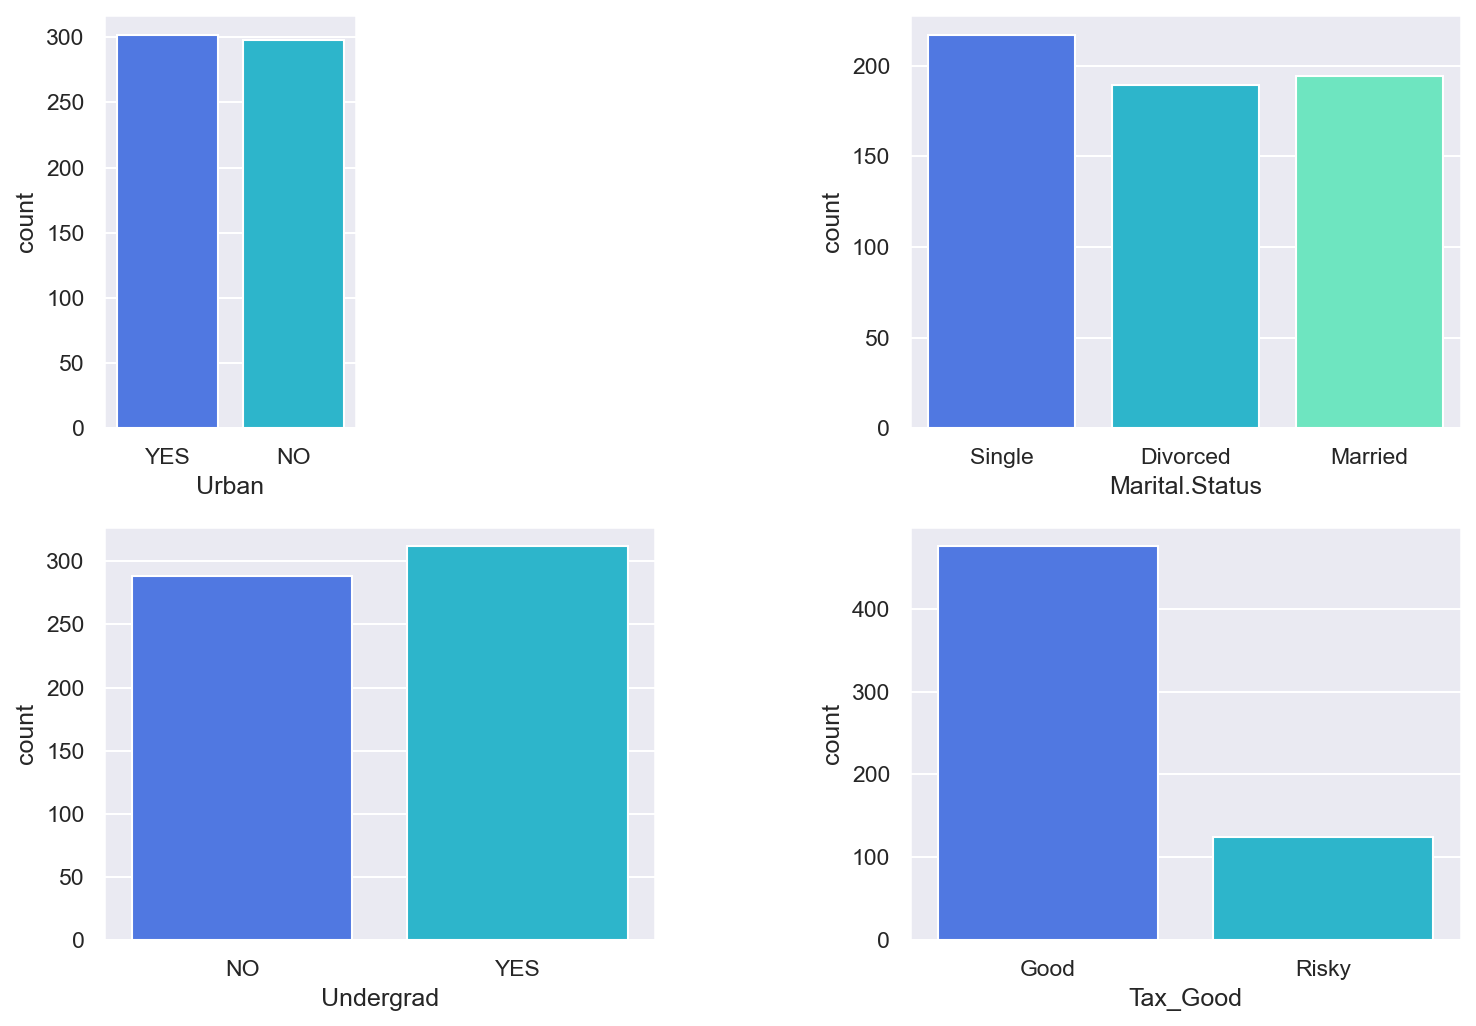

In [12]:
plt.subplot(2,4,1)
sns.countplot(df['Urban'])

plt.subplot(2,2,2)
sns.countplot(df['Marital.Status'])

plt.subplot(2,2,3)
sns.countplot(df['Undergrad'])

plt.subplot(2,2,4)
sns.countplot(df['Tax_Good'])

plt.tight_layout()

In [13]:
# Encoding categorical Columns


In [14]:
df_cate_cols = df.select_dtypes([object,]).columns


In [15]:
from sklearn.preprocessing import OrdinalEncoder ,StandardScaler

In [16]:
oe = OrdinalEncoder()
df[df_cate_cols] = oe.fit_transform(df[df_cate_cols])

In [17]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Good
0,0.0,2.0,50047,10,1.0,0.0
1,1.0,0.0,134075,18,1.0,0.0
2,0.0,1.0,160205,30,1.0,0.0
3,1.0,2.0,193264,15,1.0,0.0
4,0.0,1.0,27533,28,0.0,0.0
...,...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0,0.0
596,1.0,0.0,55369,2,1.0,0.0
597,0.0,0.0,154058,0,1.0,0.0
598,1.0,1.0,180083,17,0.0,0.0


In [18]:
x = df.iloc[:,:-1]
y = df['Tax_Good']

In [19]:
sc = StandardScaler()
sc.fit_transform(x)


array([[-1.040833  ,  1.16079994, -1.17852072, -0.62914254,  0.99335541],
       [ 0.96076892, -1.27444469,  0.50850002,  0.27636996,  0.99335541],
       [-1.040833  , -0.05682237,  1.03310911,  1.63463872,  0.99335541],
       ...,
       [-1.040833  , -1.27444469,  0.90969648, -1.76103318,  0.99335541],
       [ 0.96076892, -0.05682237,  1.43219749,  0.1631809 , -1.00668904],
       [-1.040833  , -1.27444469,  0.9915901 ,  0.04999184, -1.00668904]])

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)
print(f"Train Accuracy : {rfc.score(xtrain,ytrain)}\n Test Accuracy:{rfc.score(xtest,ytest)}")

Train Accuracy : 1.0
 Test Accuracy:0.775


In [22]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87        97
         1.0       0.00      0.00      0.00        23

    accuracy                           0.78       120
   macro avg       0.40      0.48      0.44       120
weighted avg       0.65      0.78      0.71       120



# Hyperparameter Tunning

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
rfc = RandomForestClassifier()

params = {
    'criterion': ['gini','entropy'],
    'max_depth' : [1,2,3,4,5,6,7]
}

In [25]:
grid = GridSearchCV(RandomForestClassifier(),params)

In [26]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]})

In [27]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [28]:
rfc = RandomForestClassifier(criterion='gini',max_depth=1)
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)
print(f"Train Accuracy : {rfc.score(xtrain,ytrain)}\n Test Accuracy:{rfc.score(xtest,ytest)}")

Train Accuracy : 0.7895833333333333
 Test Accuracy:0.8083333333333333


In [29]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        97
         1.0       0.00      0.00      0.00        23

    accuracy                           0.81       120
   macro avg       0.40      0.50      0.45       120
weighted avg       0.65      0.81      0.72       120



## Here we have 80% Accuracy, now we can say this is Generalize Model